<a href="https://colab.research.google.com/github/Freakscode/Auto2/blob/main/Lab3_Muscle_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
from scipy.fft import fft, fftfreq
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
data = '/content/drive/MyDrive/Lab 3/DATA_EMG.csv'
df = pd.read_csv(data)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686525 entries, 0 to 686524
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Time                              686525 non-null  float64
 1   Right Rectus femoris              686525 non-null  float64
 2   Left Gluteus maximus              686525 non-null  float64
 3   Left Gastrocnemius medialis       686525 non-null  float64
 4   Left Semitendinosus               686525 non-null  float64
 5   Left Biceps femoris caput longus  686525 non-null  float64
 6   Right Vastus medialis             686525 non-null  float64
 7   Right Tibialis anterior           686525 non-null  float64
 8   Left Gastrocnemius lateralis      686525 non-null  float64
 9   Target                            686525 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 52.4 MB


In [ ]:
df

,Time,Right Rectus femoris,Left Gluteus maximus,Left Gastrocnemius medialis,Left Semitendinosus,Left Biceps femoris caput longus,Right Vastus medialis,Right Tibialis anterior,Left Gastrocnemius lateralis,Target
0,0.000,-0.000264,-0.000015,0.000344,0.000108,0.000182,0.000401,0.000267,-0.000236,0
1,0.001,-0.001002,-0.000045,0.001342,0.000429,0.000712,0.002234,0.001234,-0.001108,0
2,0.002,-0.002173,-0.000034,0.002944,0.001133,0.001692,0.007634,0.003457,-0.003277,0
3,0.003,-0.002676,0.000185,0.003504,0.002319,0.002820,0.017656,0.006587,-0.006940,0
4,0.004,-0.000844,0.000785,0.000426,0.003950,0.003729,0.028542,0.008889,-0.011310,0
...,...,...,...,...,...,...,...,...,...,...
686520,686.520,0.005763,-0.001938,-0.000352,-0.013012,0.003702,-0.006163,-0.019424,-0.014356,2
686521,686.521,0.008618,-0.000688,0.011859,-0.005562,0.003529,-0.005228,-0.035847,-0.044197,2
686522,686.522,0.009091,0.001189,0.018031,0.000837,0.003457,-0.004427,-0.028256,-0.039693,2
686523,686.523,0.005966,0.003530,0.014253,0.004779,0.003590,-0.004010,-0.006791,-0.006187,2


In [ ]:
for i in range(len(df)):
  if(df.iloc[i, -1]==2):
    df.iloc[i, -1]=1

In [ ]:
df

,Time,Right Rectus femoris,Left Gluteus maximus,Left Gastrocnemius medialis,Left Semitendinosus,Left Biceps femoris caput longus,Right Vastus medialis,Right Tibialis anterior,Left Gastrocnemius lateralis,Target
0,0.000,-0.000264,-0.000015,0.000344,0.000108,0.000182,0.000401,0.000267,-0.000236,0
1,0.001,-0.001002,-0.000045,0.001342,0.000429,0.000712,0.002234,0.001234,-0.001108,0
2,0.002,-0.002173,-0.000034,0.002944,0.001133,0.001692,0.007634,0.003457,-0.003277,0
3,0.003,-0.002676,0.000185,0.003504,0.002319,0.002820,0.017656,0.006587,-0.006940,0
4,0.004,-0.000844,0.000785,0.000426,0.003950,0.003729,0.028542,0.008889,-0.011310,0
...,...,...,...,...,...,...,...,...,...,...
686520,686.520,0.005763,-0.001938,-0.000352,-0.013012,0.003702,-0.006163,-0.019424,-0.014356,1
686521,686.521,0.008618,-0.000688,0.011859,-0.005562,0.003529,-0.005228,-0.035847,-0.044197,1
686522,686.522,0.009091,0.001189,0.018031,0.000837,0.003457,-0.004427,-0.028256,-0.039693,1
686523,686.523,0.005966,0.003530,0.014253,0.004779,0.003590,-0.004010,-0.006791,-0.006187,1


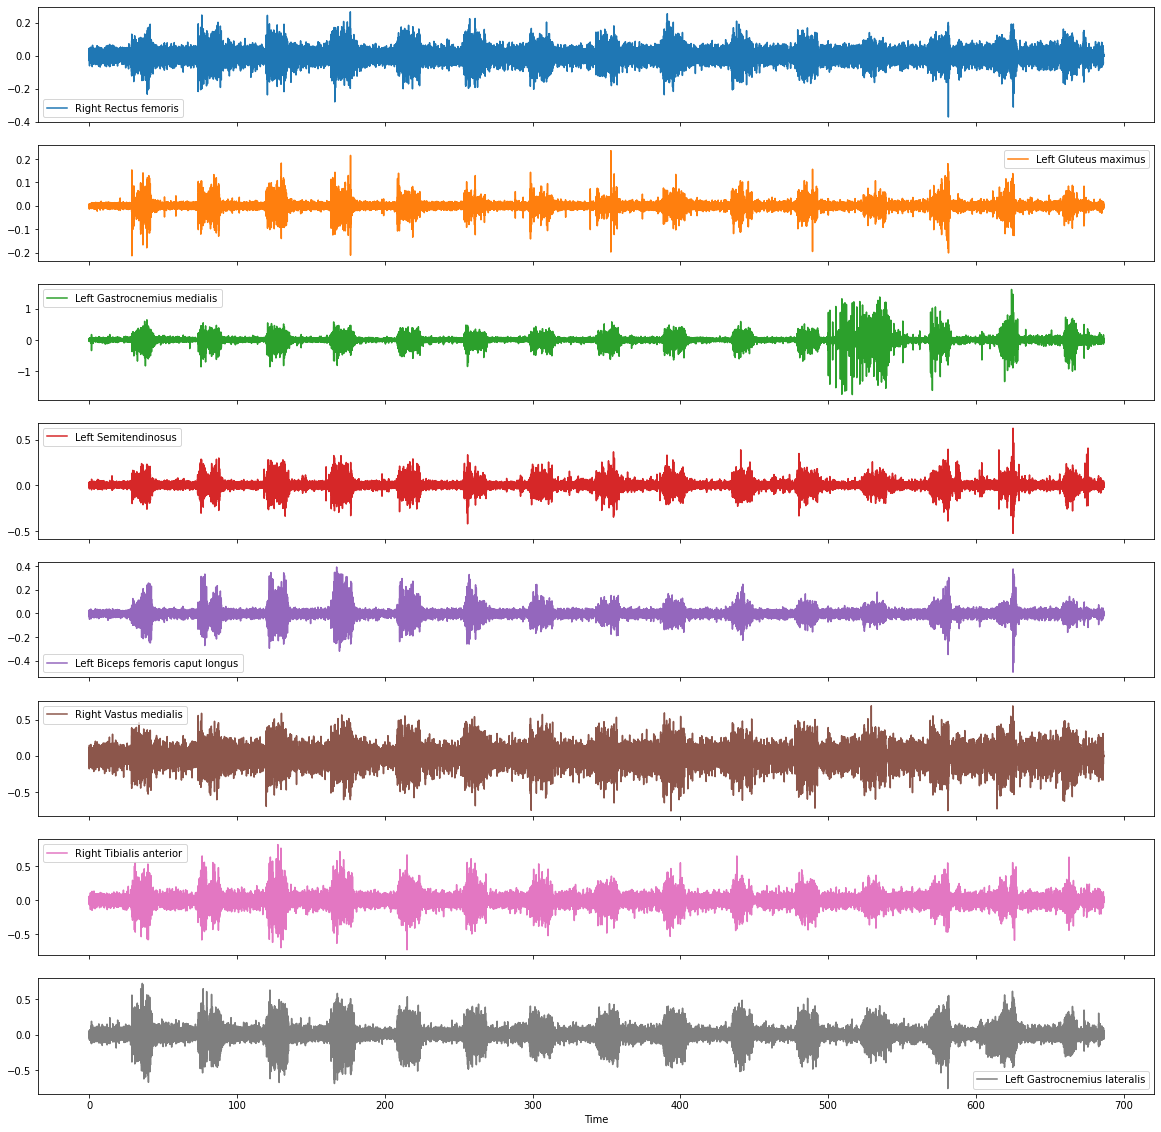

In [ ]:
df
df.plot(x='Time', y=['Right Rectus femoris', 'Left Gluteus maximus', 'Left Gastrocnemius medialis', 'Left Semitendinosus', 'Left Biceps femoris caput longus', 'Right Vastus medialis',
                     'Right Tibialis anterior', 'Left Gastrocnemius lateralis'], kind = 'line', figsize = (20,20), subplots=True)
plt.show()

In [ ]:
freq = 1000
cant_vent = int(len(df)/freq)
Ventana = np.zeros((cant_vent,10))
Dataset_2=np.array(df)
Dato=np.zeros((cant_vent, 10))
for i in range (0, int(len(df)/freq)):
  Ventana=Dataset_2[(i*freq):((i*freq)+freq),:]
  Dato[i]=np.mean(Ventana, axis=0)
columns = ['Time (s)', 'Right Rectus Femoris', 'Left Gluteus Maximus',
                                         'Left Gastrocnemius Medialis', 'Left semitendinosus',
                                         'Left Biceps Femoris Caput Longus', 'Right Vastus Medialis',
                                         'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis', 'Target']
df_transformed = pd.DataFrame(Dato, columns=columns)
df_transformed

,Time (s),Right Rectus Femoris,Left Gluteus Maximus,Left Gastrocnemius Medialis,Left semitendinosus,Left Biceps Femoris Caput Longus,Right Vastus Medialis,Right Tibialis Anterior,Left Gastrocnemius Lateralis,Target
0,0.4995,0.000045,1.923540e-05,-0.000080,0.000058,0.000043,-0.000021,-2.840982e-05,0.000211,0.0
1,1.4995,-0.000045,-1.810325e-06,0.000053,-0.000014,0.000021,0.000021,-6.771324e-05,-0.000340,0.0
2,2.4995,0.000136,1.489724e-06,0.000276,-0.000027,-0.000051,-0.000115,5.225433e-05,0.000093,0.0
3,3.4995,0.000080,1.984335e-06,-0.000374,-0.000012,-0.000050,-0.000027,-6.911869e-05,-0.000227,0.0
4,4.4995,-0.000375,-2.246663e-05,0.000177,0.000042,0.000037,0.000161,1.295356e-04,-0.000022,0.0
...,...,...,...,...,...,...,...,...,...,...
681,681.4995,-0.000091,-5.279076e-07,-0.000680,0.000107,-0.000010,-0.000085,-2.720079e-05,0.000373,1.0
682,682.4995,0.000003,2.906505e-05,0.000350,0.000132,-0.000010,0.000235,-2.749086e-07,-0.000255,1.0
683,683.4995,-0.000034,5.821844e-07,0.000015,-0.000226,-0.000065,0.000332,-1.195577e-04,0.000593,1.0
684,684.4995,0.000063,2.018275e-05,-0.001522,0.000203,0.000192,-0.000427,8.383121e-05,-0.000648,1.0


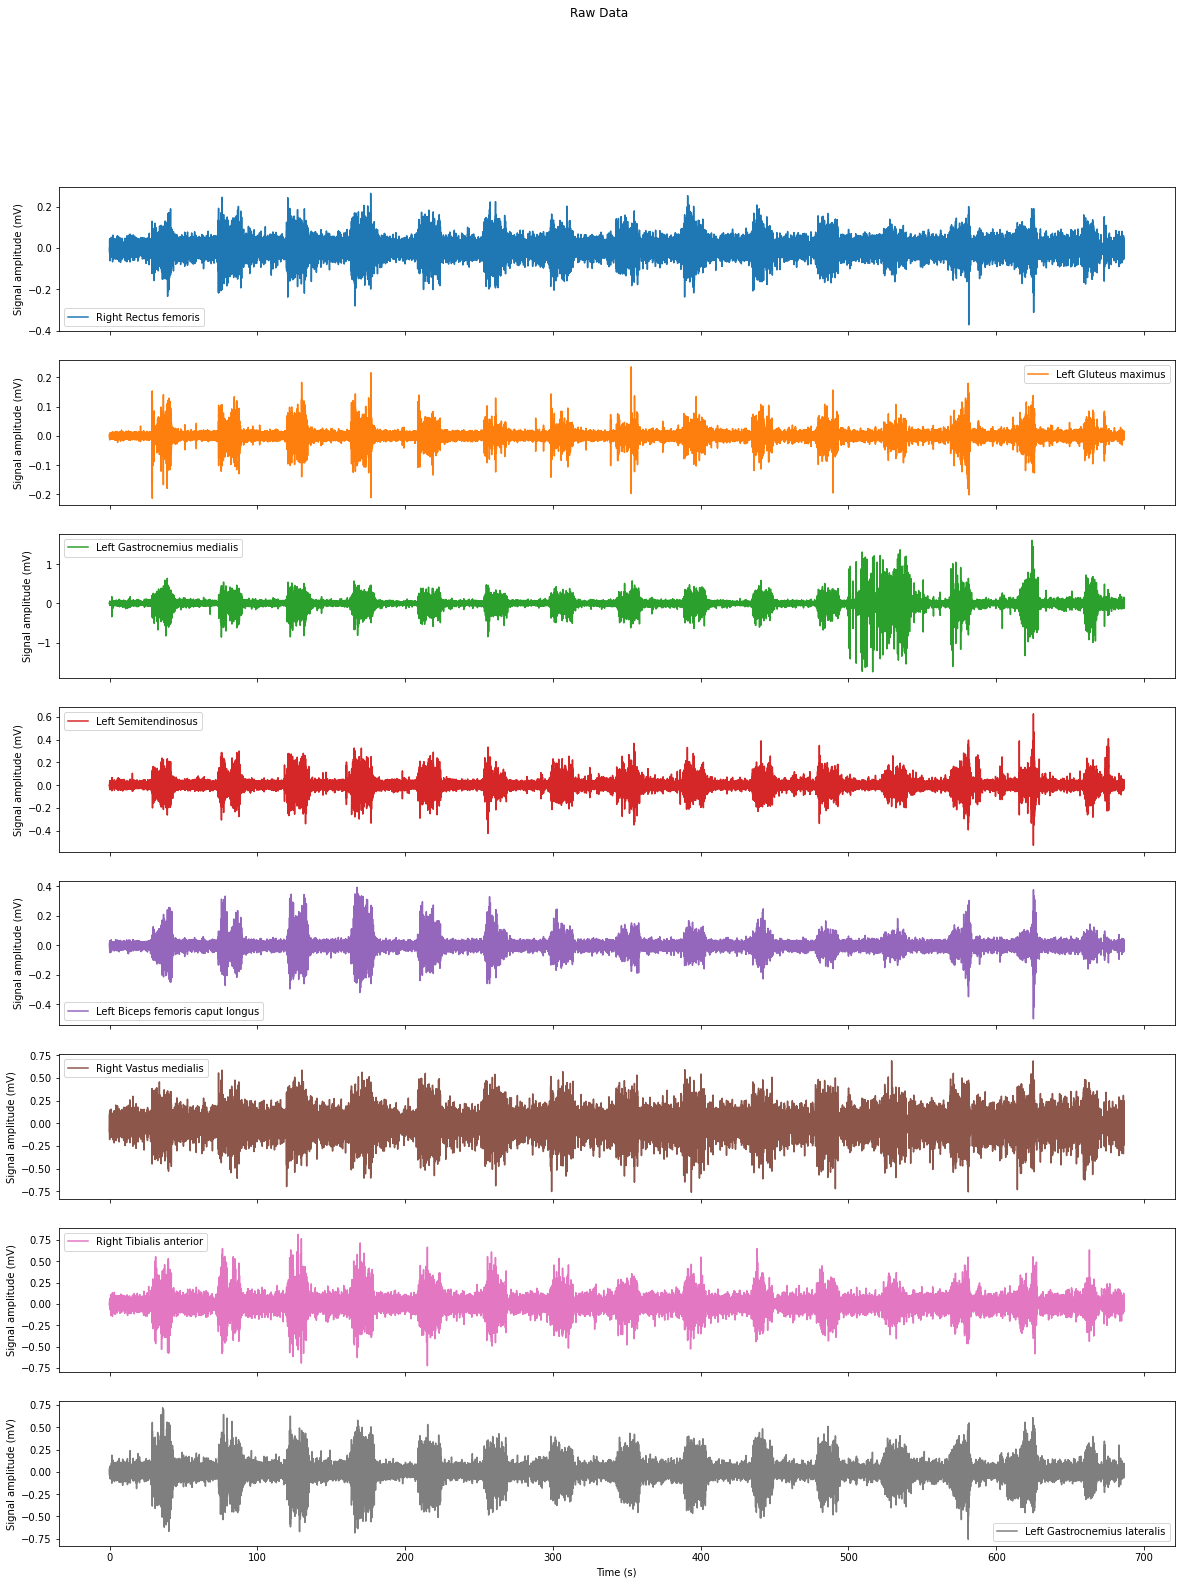

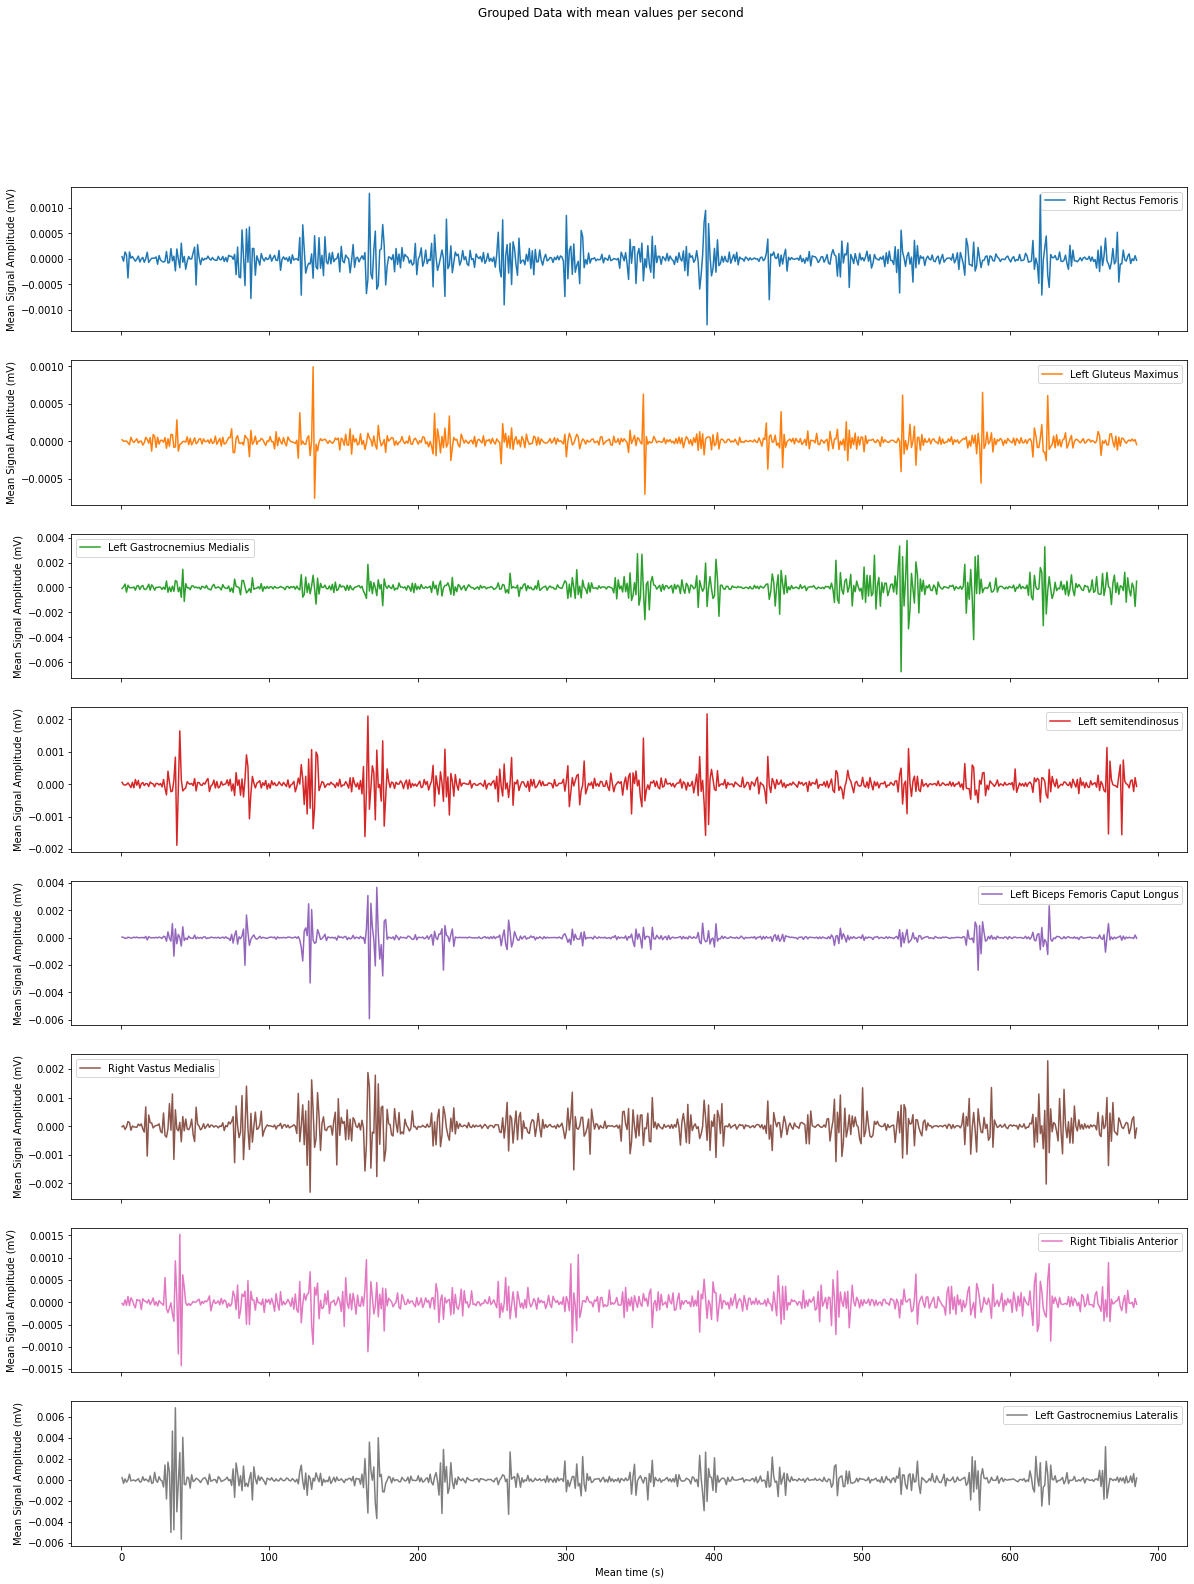

In [ ]:
df.plot(x='Time', y=['Right Rectus femoris', 'Left Gluteus maximus', 'Left Gastrocnemius medialis', 'Left Semitendinosus', 'Left Biceps femoris caput longus', 'Right Vastus medialis',
                     'Right Tibialis anterior', 'Left Gastrocnemius lateralis'], kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Time (s)',
         ylabel='Signal amplitude (mV)', title = 'Raw Data')
plt.show()

df_transformed.plot(x = 'Time (s)', y = ['Right Rectus Femoris', 'Left Gluteus Maximus', 'Left Gastrocnemius Medialis', 'Left semitendinosus','Left Biceps Femoris Caput Longus',
                                     'Right Vastus Medialis', 'Right Tibialis Anterior', 'Left Gastrocnemius Lateralis'],
                     kind = 'line', figsize = (20, 25), subplots=True, layout=(8,1), xlabel = 'Mean time (s)', ylabel='Mean Signal Amplitude (mV)', title='Grouped Data with mean values per second')
plt.show()

# Exploratory review of the Transformed DataFrame

In [ ]:
df_transformed.info()
df_transformed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Time (s)                          686 non-null    float64
 1   Right Rectus Femoris              686 non-null    float64
 2   Left Gluteus Maximus              686 non-null    float64
 3   Left Gastrocnemius Medialis       686 non-null    float64
 4   Left semitendinosus               686 non-null    float64
 5   Left Biceps Femoris Caput Longus  686 non-null    float64
 6   Right Vastus Medialis             686 non-null    float64
 7   Right Tibialis Anterior           686 non-null    float64
 8   Left Gastrocnemius Lateralis      686 non-null    float64
 9   Target                            686 non-null    float64
dtypes: float64(10)
memory usage: 53.7 KB


,Time (s),Right Rectus Femoris,Left Gluteus Maximus,Left Gastrocnemius Medialis,Left semitendinosus,Left Biceps Femoris Caput Longus,Right Vastus Medialis,Right Tibialis Anterior,Left Gastrocnemius Lateralis,Target
count,686.000000,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,6.860000e+02,686.000000
mean,342.999500,1.694008e-08,1.053954e-08,-1.098141e-06,7.493875e-08,1.055782e-07,-7.402913e-08,-3.120647e-08,4.637560e-08,0.300292
std,198.175427,2.259300e-04,1.097972e-04,7.314310e-04,3.377751e-04,5.062376e-04,4.566446e-04,2.449691e-04,8.828549e-04,0.458719
min,0.499500,-1.294289e-03,-7.643195e-04,-6.776009e-03,-1.883376e-03,-5.930728e-03,-2.315086e-03,-1.425605e-03,-5.670886e-03,0.000000
25%,171.749500,-6.902880e-05,-3.643713e-05,-1.779321e-04,-9.071398e-05,-6.825533e-05,-1.157371e-04,-9.159292e-05,-1.919415e-04,0.000000
50%,342.999500,-2.086281e-06,-1.004502e-06,-2.630381e-07,3.318722e-06,3.211185e-06,-8.161386e-07,-5.323573e-06,-1.461353e-05,0.000000
75%,514.249500,7.422990e-05,3.442677e-05,1.690460e-04,8.666879e-05,6.178397e-05,1.217499e-04,9.242184e-05,1.913089e-04,1.000000
max,685.499500,1.287078e-03,9.941655e-04,3.789816e-03,2.170257e-03,3.680536e-03,2.288523e-03,1.524464e-03,6.876155e-03,1.000000


# Parameter Selection through Feature Engineering techniques

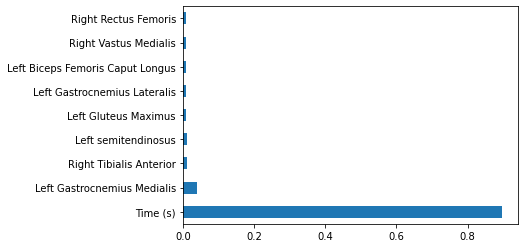

Time (s)                            0.896114
Left Gastrocnemius Medialis         0.040516
Right Tibialis Anterior             0.010839
Left semitendinosus                 0.010057
Left Gluteus Maximus                0.009647
Left Gastrocnemius Lateralis        0.009020
Left Biceps Femoris Caput Longus    0.008481
Right Vastus Medialis               0.007972
Right Rectus Femoris                0.007353
dtype: float64


In [ ]:
X = df_transformed.iloc[:, :-1]
y = df_transformed.iloc[:, -1]

model = RandomForestClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
print(feat_importances.nlargest(10))

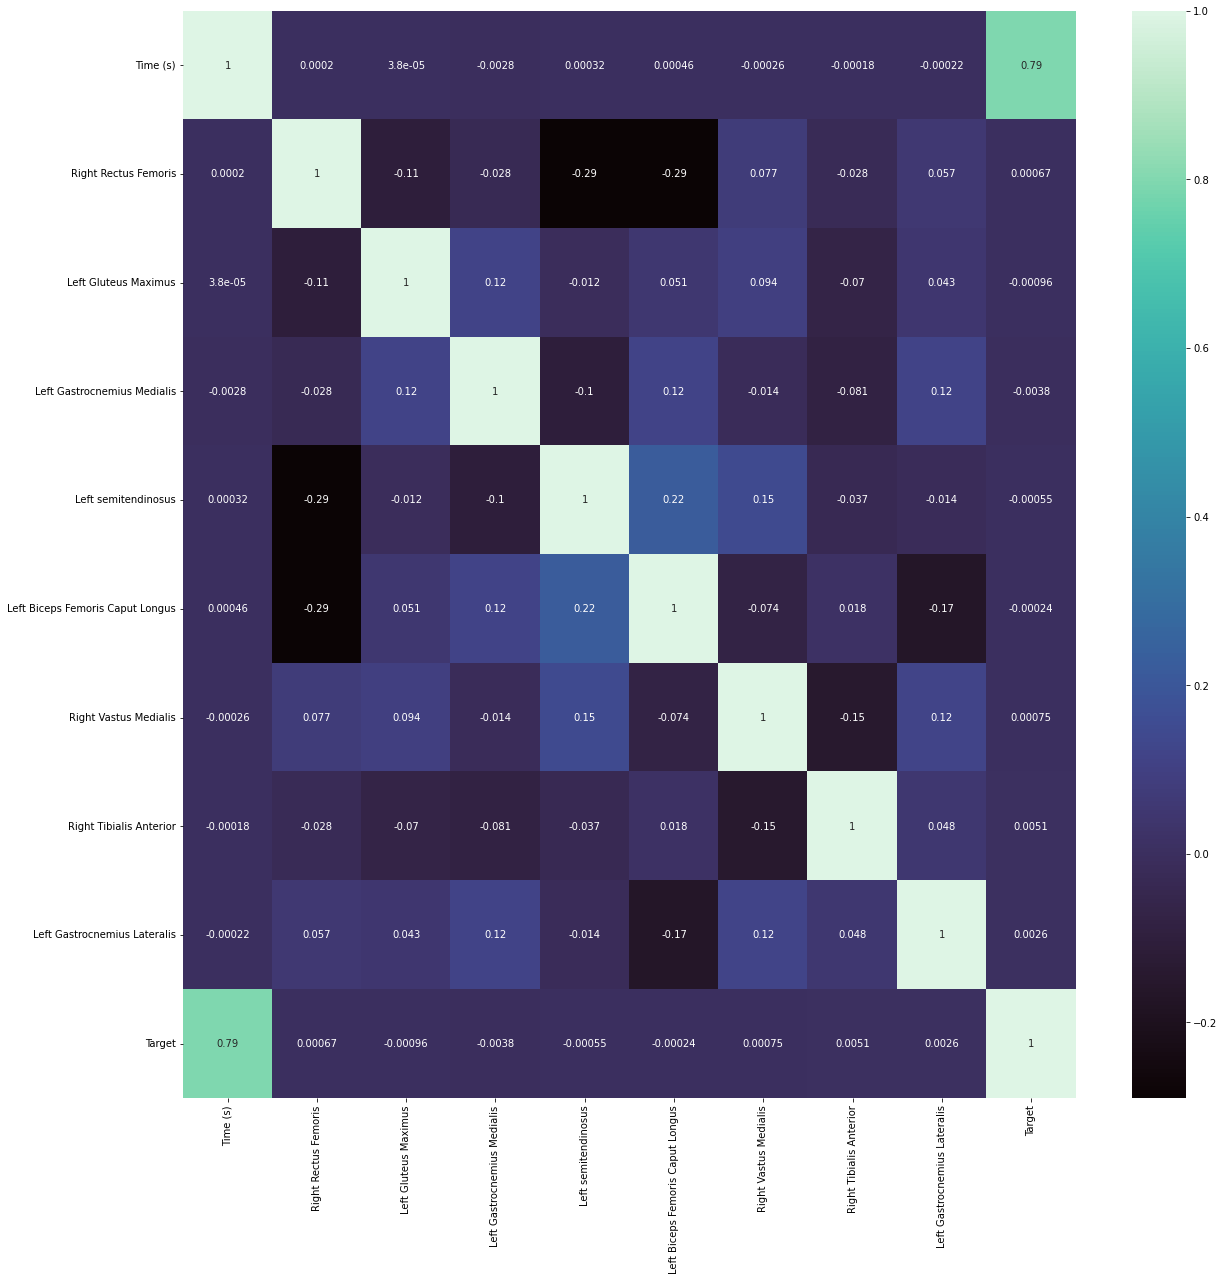

In [ ]:
# Matrix correlation:
plt.figure(figsize=(20,20))
sns.heatmap(data = df_transformed.corr(),annot=True,cmap="mako")
plt.show()


In [ ]:
#Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(df_transformed[['Time (s)', 'Left Gastrocnemius Medialis',
                                                                    'Right Vastus Medialis', 'Right Tibialis Anterior']], y, test_size = 0.85, random_state = 85, stratify=y)

#Let's check the shape of the training and test sets.

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(102, 4) (102,) (584, 4) (584,)


# Fare review of classification methods for EMG Dataset

Accuracy score test for 1 trees and criterion gini: 0.9297945205479452
Accuracy score train for 1 trees and criterion gini: 0.9607843137254902
Accuracy score test for 1 trees and criterion entropy: 0.9297945205479452
Accuracy score train for 1 trees and criterion entropy: 0.9607843137254902
Accuracy score test for 10 trees and criterion gini: 0.988013698630137
Accuracy score train for 10 trees and criterion gini: 1.0
Accuracy score test for 10 trees and criterion entropy: 0.988013698630137
Accuracy score train for 10 trees and criterion entropy: 1.0
Accuracy score test for 19 trees and criterion gini: 0.988013698630137
Accuracy score train for 19 trees and criterion gini: 1.0
Accuracy score test for 19 trees and criterion entropy: 0.988013698630137
Accuracy score train for 19 trees and criterion entropy: 1.0
Accuracy score test for 28 trees and criterion gini: 0.9914383561643836
Accuracy score train for 28 trees and criterion gini: 1.0
Accuracy score test for 28 trees and criterion ent

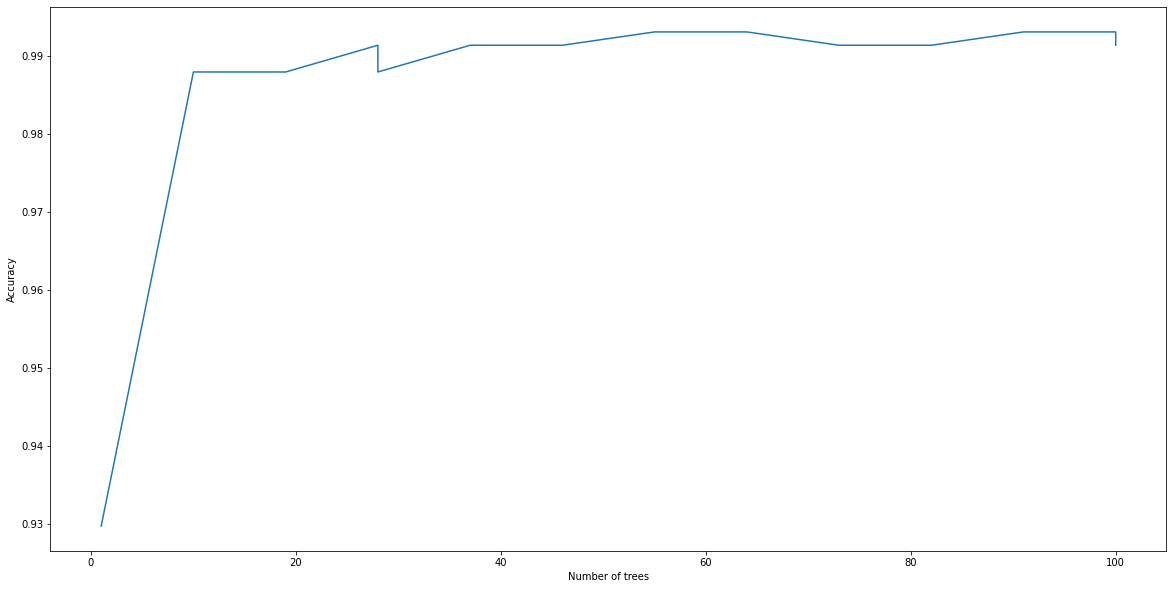

'The best accuracy score for test subset is: 0.9931506849315068 and the best for train subset is: 1.0 with number of trees: 55 and criterion gini'

In [ ]:
#Create a function that fit the model in a Random Forest Classifier and return the accuracy score.

def random_forest(X_train, y_train, X_test, y_test):
    global y_pred, best_trees, best_accuracy, best_criterion
    tree_num = []
    accuracy = []
    criterion = []
    for i in range(1, 109, 9):
        for j in ['gini', 'entropy']:
            rf = RandomForestClassifier(n_estimators=i, random_state=42, criterion=j, n_jobs=4)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            y_pred_train = rf.predict(X_train)
            a_s_test= accuracy_score(y_test, y_pred)
            a_s_train = accuracy_score(y_train, y_pred_train)
            print(f'Accuracy score test for {i} trees and criterion {j}: {a_s_test}')
            print(f'Accuracy score train for {i} trees and criterion {j}: {a_s_train}')
            tree_num.append(i)
            accuracy.append(accuracy_score(y_test, y_pred))
            #Save the best accuracy_score and the number of trees.3
            if i == 1:
                best_accuracy = a_s_test
                best_accuracy_train = a_s_train
                best_trees = i
                best_criterion = j
            elif accuracy_score(y_test, y_pred) > best_accuracy:
                best_accuracy = accuracy_score(y_test, y_pred)
                best_accuracy_train = accuracy_score(y_train, y_pred_train)
                best_trees = i
                best_criterion = j
    plt.figure(figsize=(20,10))
    plt.plot(tree_num, accuracy)
    plt.xlabel('Number of trees')
    plt.ylabel('Accuracy')
    plt.show()

    return f'The best accuracy score for test subset is: {best_accuracy} and the best for train subset is: {best_accuracy_train} with number of trees: {best_trees} and criterion {best_criterion}'

random_forest(X_train, y_train, X_test, y_test)

In [ ]:
def knn(X_train, y_train, X_test, y_test):
    global y_pred, best_k, best_accuracy, best_weight, best_p
    k = []
    accuracy = []
    for i in range(1, 20, 1):
        for j in ['uniform', 'distance']:
            for power in [1,2,3,4,5]:
                knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1, weights=j, p=power)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                y_pred_train = knn.predict(X_train)
                a_s_test= accuracy_score(y_test, y_pred)
                a_s_train = accuracy_score(y_train, y_pred_train)
                print(f'Accuracy score for {i} neighbors in test: {a_s_test} and for {i} neighbors in train: {a_s_train} weight {j} with a power of {power}')
                k.append(i)
                accuracy.append(accuracy_score(y_test, y_pred))
                #Save the best accuracy_score and the number of neighbors.
                if i == 1:
                    best_accuracy = a_s_test
                    best_accuracy_train = a_s_train
                    best_k = i
                    best_weight = j
                    best_p=power
                elif accuracy_score(y_test, y_pred) > best_accuracy:
                    best_accuracy = a_s_test
                    best_accuracy_train = a_s_train
                    best_k = i
                    best_weight = j
                    best_p = power

    plt.figure(figsize=(20,10))
    plt.plot(k, accuracy)
    plt.plot()
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()

    return f'The best accuracy score for test is: {best_accuracy}, for train is: {best_accuracy_train} and the best number of neighbors is: {best_k} with weight defined as {best_weight} with a power of {best_p}'

Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 1
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 2
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 3
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 4
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight uniform with a power of 5
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight distance with a power of 1
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight distance with a power of 2
Accuracy score for 1 neighbors in test: 0.9965753424657534 and for 1 neighbors in train: 1.0 weight distance with a 

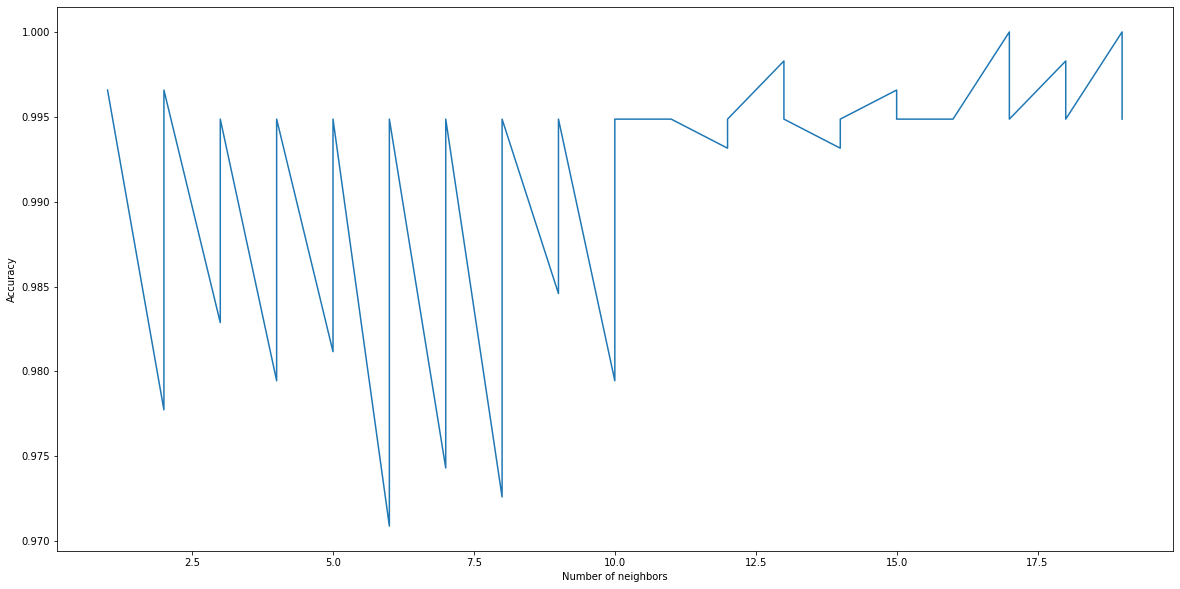

'The best accuracy score for test is: 1.0, for train is: 1.0 and the best number of neighbors is: 17 with weight defined as uniform with a power of 1'

In [ ]:
knn(X_train, y_train, X_test, y_test)

In [ ]:
def gamma_SVM(X_train, y_train, X_test, y_test):
    gamma = []
    accuracy = []
    for i in np.arange(0.1, 3, 0.5):
        for j in [0.1, 1, 10, 100]:
            model = SVC(random_state=None, kernel='rbf', C=j, gamma=i)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(f'Accuracy score for gamma {i} and C {j}: {accuracy_score(y_test, y_pred)}')
            gamma.append(i)
            accuracy.append(accuracy_score(y_test, y_pred))
    plt.figure(figsize=(20,10))
    plt.plot(gamma, accuracy)
    plt.xlabel('Gamma')
    plt.ylabel('Accuracy')
    plt.show()

    return f'The best accuracy score is: {max(accuracy)} and the best gamma is: {gamma[accuracy.index(max(accuracy))]} with C {j}'

Accuracy score for gamma 0.1 and C 0.1: 0.7003424657534246
Accuracy score for gamma 0.1 and C 1: 0.8373287671232876
Accuracy score for gamma 0.1 and C 10: 0.863013698630137
Accuracy score for gamma 0.1 and C 100: 0.863013698630137
Accuracy score for gamma 0.6 and C 0.1: 0.7003424657534246
Accuracy score for gamma 0.6 and C 1: 0.7722602739726028
Accuracy score for gamma 0.6 and C 10: 0.7722602739726028
Accuracy score for gamma 0.6 and C 100: 0.7722602739726028
Accuracy score for gamma 1.1 and C 0.1: 0.7003424657534246
Accuracy score for gamma 1.1 and C 1: 0.7071917808219178
Accuracy score for gamma 1.1 and C 10: 0.7551369863013698
Accuracy score for gamma 1.1 and C 100: 0.7551369863013698
Accuracy score for gamma 1.6 and C 0.1: 0.7003424657534246
Accuracy score for gamma 1.6 and C 1: 0.7003424657534246
Accuracy score for gamma 1.6 and C 10: 0.7071917808219178
Accuracy score for gamma 1.6 and C 100: 0.7071917808219178
Accuracy score for gamma 2.1 and C 0.1: 0.7003424657534246
Accuracy sc

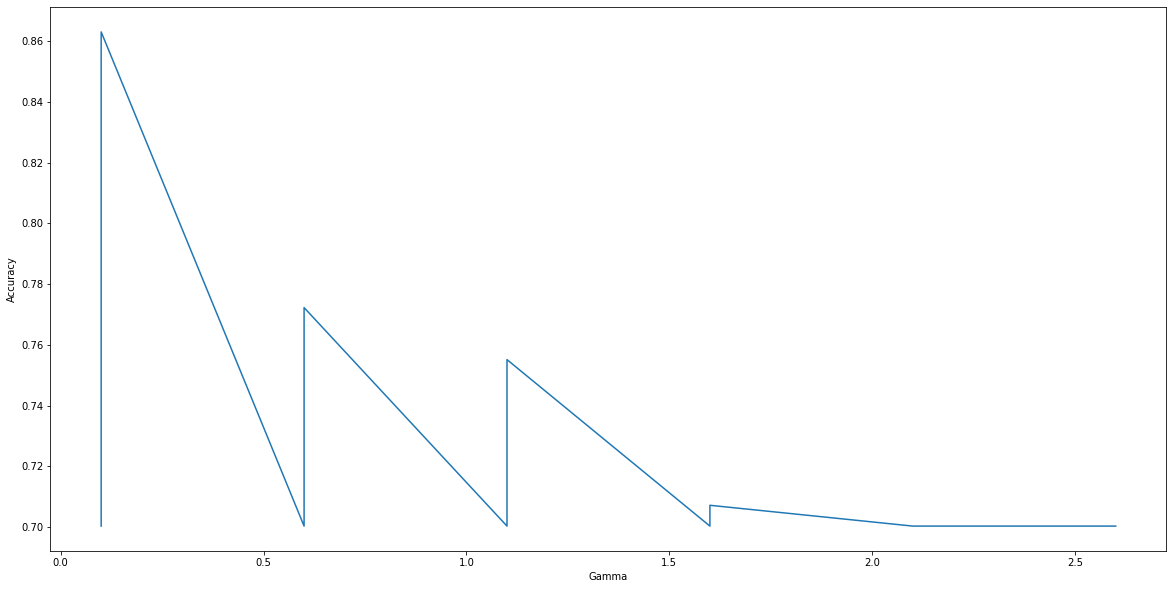

'The best accuracy score is: 0.863013698630137 and the best gamma is: 0.1 with C 100'

In [ ]:
gamma_SVM(X_train, y_train, X_test, y_test)

# Grid Search application to classifiers

In [ ]:
pipe = Pipeline([("classifier", KNeighborsClassifier())])
search_space = [
    {
        "classifier" : [LogisticRegression()],
        "classifier__penalty" : ['none', 'l1', 'l2', 'elasticnet'],
        "classifier__max_iter" : [i for i in range(1, 10000, 1000)],
        "classifier__n_jobs" : [1, 2, 3, 4, -1]
     },

     {
        "classifier" : [RandomForestClassifier()],
        "classifier__n_estimators" : [i for i in range(1,1000,100)],
        "classifier__criterion" : ['gini', 'entropy', 'log_loss'],
        "classifier__class_weight" : ['balanced', 'balanced_subsample']
     },

     {
        "classifier" : [KNeighborsClassifier()],
        "classifier__n_neighbors" : [i for i in range(1, 20, 1)],
        "classifier__weights" : ['uniform', 'distance'],
        "classifier__algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "classifier__p" : [1, 2]
     },

     {
        "classifier" : [NuSVC()],
        "classifier__nu" : [0.2, 0.4, 0.6, 0.8, 1],
        "classifier__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
        "classifier__decision_function_shape" : ['ovo', 'ovr']
     },

     {
        "classifier" : [LinearSVC()],
        "classifier__penalty" : ['l1', 'l2'],
        "classifier__loss" : ['hinge', 'squared_hinge'],
        "classifier__multi_class" : ['ovr', 'crammer_singer'],
        "classifier__max_iter" : [i for i in range(1, 5000, 200)]
     },

     {
        "classifier" : [SVC()],
        "classifier__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
        "classifier__gamma" : ['scale', 'auto']
     }
]

In [ ]:
#GridSearch:

classif = GridSearchCV(pipe, search_space, cv=15, verbose=0, n_jobs=-1)
best_clf=classif.fit(X_train, y_train)
print(f'El mejor modelo es: {best_clf.best_estimator_.get_params()["classifier"]}')

El mejor modelo es: KNeighborsClassifier(n_neighbors=9, p=1)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2798 fits failed out of a total of 12180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)